 # Taller Ciencia de Datos 

### ***Tarea Laboratorio 2019***

---
<div class="text-center"> Andrea Correa </div>
<div class="text-center">Maria Laura Gayo </div>
<div class="text-center"> Mariano Koci </div>
<div class="text-center">Alejandro Wohlwend </div>
<div class="text-center">Renzo Daset </div>
<div class="text-center">Laura Rodriguez </div>

---


<a id='Indice'></a>
### Índice

1. [Adquisición de datos](#Adquisicion-Datos)
 
2. [Transformación de los datos](#Transformacion)

3. [Análisis de los objetivos del Negocio y como se mapeo a los datos disponibles](#Analisis)

4. [Análisis y visualización para los requerimientos de negocio](#Visualización)

5. [Conclusiones](#Conclusiones)

---

<a id='Adquisicion-Datos'></a>
### Adquisición de los Datos
---
 La ingesta de datos se realizó  mediante los pasos que se muestran a continuación:




In [3]:
# Importamos los archivos CSV
archivo <- "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/compras2018_1ero.csv"
archivo <- "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/compras2018_2do.csv"

In [4]:
# Cargamos datos del archivo
datos <- read.csv(archivo)

In [5]:
# Cargamos datos del archivo
datos2 <- read.csv(archivo2)

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : objeto 'archivo2' no encontrado


In [ ]:
# Unimos los datos de ambos archivos
datosAll<-rbind(datos,datos2)

In [7]:
# Imprimmimos las primeras filas del CSV
head(datos)

anio_compra,apel,arch_adj,arch_reiteracion,es_reiteracion,estado_compra,fecha_compra,fecha_pub_adj,fondos_rotatorios,id_compra,...,id_tipo_resol,id_tipocompra,id_ue,monto_adj,nro_ampliacion,num_compra,num_resol,objeto,subtipo_compra,open_contracting_link
2018,N,acta_637079.pdf,,N,7,26/07/2018,31/07/2018 14:35,N,637079,...,4,LA,30,0.00,0,2,30,SERVICIO DE CAMILLEROS,COM,https://comprasestatales.gub.uy/ocds/record/637079
2018,N,acta_637085.pdf,,N,7,26/07/2018,31/07/2018 14:40,N,637085,...,4,LA,30,0.00,0,4,27,SERVICIO DE LAVADO Y PLANCHADO,COM,https://comprasestatales.gub.uy/ocds/record/637085
2018,S,acta_636213.pdf,,N,7,26/04/2018,01/08/2018 10:20,N,636213,...,1,LA,76,1010160.00,0,10,3122018,MANTENIMIENTO DE LAS REDES DE GASES MEDICINALES,COM,https://comprasestatales.gub.uy/ocds/record/636213
2018,,,,N,7,01/06/2018,27/07/2018 11:20,N,664776,...,1,CD,5,28274.72,0,5018,5018,DGSG. RECARGAS DE GARRAFA A SUPERGAS - AÃ‘O:2018,COM,https://comprasestatales.gub.uy/ocds/record/664776
2018,,,,N,7,10/05/2018,27/07/2018 11:25,N,664773,...,1,CD,1,983.81,0,282,0,Frascos de cola adhesiva.,COM,https://comprasestatales.gub.uy/ocds/record/664773
2018,,,,N,7,20/07/2018,27/07/2018 11:25,N,661416,...,1,CD,28,25742.00,0,61,0,REPARACION IMPRESORAS HL 5450,COM,https://comprasestatales.gub.uy/ocds/record/661416


In [10]:
# Importamos la libreria dplyr
library(dplyr)
install.packages("tidyverse")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\Rtmp8oA5DJ\downloaded_packages


<a id='Analisis'></a>
### Análisis

---
*Se quiere obtener la siguiente información a partir de los datos*
&nbsp;

1. TOP 20 de las organizaciones que gastaron más dinero (ordenados de forma descendente).
2. TOP 50 de las compras más caras.
3. Agregación de monto total por tipo de producto
4. TOP 10 de las unidades ejecutoras que más compraron en el periodo
5. Compras directas mayores $436.000.

Para ello

In [11]:
# Selecciona solamente las columnas Anio_Compra, id_moneda_monto_adj, id_ue, monto_adj,  
dataSelect <- select(datos, anio_compra, id_inciso,id_moneda_monto_adj, id_ue, monto_adj);

In [12]:
# Imprimo primeras filas del CSV
head(dataSelect)

anio_compra,id_inciso,id_moneda_monto_adj,id_ue,monto_adj
2018,29,0,30,0.00
2018,29,0,30,0.00
2018,29,0,76,1010160.00
2018,7,0,5,28274.72
2018,1,0,1,983.81
2018,4,0,28,25742.00


In [13]:
#Agrupamos los datos 

# group_by(dataSelect, dataSelect$id_ue)
datosOrdenados <-dataSelect %>% group_by(id_inciso,id_ue) %>% summarise(monto = mean(monto_adj))
f<-arrange(datosOrdenados, desc(monto))
head(f, 20)

id_inciso,id_ue,monto
25,4,4239225662
88,1,9792220
53,1,9202553
90,1,5886417
26,19,4482694
29,28,2641129
29,57,2607849
86,1,2511739
29,26,2316657
40,4,2279624


In [27]:
archivo_xml = "/Users/Andy/Desktop/Win10/UTEC/2019/Semestre 6/AD:DS/Semana1/compras/reporteUnidadesEjecutoras.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlfile <- read_xml(archivo_xml)
print(xmlfile)

{xml_document}
<unidades-ejecutoras>
 [1] <unidad-ejecutora id-inciso="1" id-ue="1" nom-ue="Cámara de Senadores"/>
 [2] <unidad-ejecutora id-inciso="1" id-ue="2" nom-ue="Cámara de Representant ...
 [3] <unidad-ejecutora id-inciso="1" id-ue="3" nom-ue="Comisión Administrativ ...
 [4] <unidad-ejecutora id-inciso="2" id-ue="1" nom-ue="Presidencia  de la Rep ...
 [5] <unidad-ejecutora id-inciso="2" id-ue="3" nom-ue="Casa Militar"/>
 [6] <unidad-ejecutora id-inciso="2" id-ue="4" nom-ue="Oficina de Planeamient ...
 [7] <unidad-ejecutora id-inciso="2" id-ue="5" nom-ue="NO VIGENTE - Dirección ...
 [8] <unidad-ejecutora id-inciso="2" id-ue="6" nom-ue="Unidad Reguladora de S ...
 [9] <unidad-ejecutora id-inciso="2" id-ue="7" nom-ue="Instituto Nacional de  ...
[10] <unidad-ejecutora id-inciso="2" id-ue="8" nom-ue="Oficina Nacional del S ...
[11] <unidad-ejecutora id-inciso="2" id-ue="9" nom-ue="Unidad Reguladora de S ...
[12] <unidad-ejecutora id-inciso="2" id-ue="10" nom-ue="AGESIC"/>
[13] <unid

In [1]:
archivo_xml = "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/reporteIncisos.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlfile <- read_xml(archivo_xml)
print(xmlfile)

{xml_document}
<incisos>
 [1] <inciso id-inciso="1" nom-inciso="Poder Legislativo"/>
 [2] <inciso id-inciso="2" nom-inciso="Presidencia de la República"/>
 [3] <inciso id-inciso="3" nom-inciso="Ministerio de Defensa Nacional"/>
 [4] <inciso id-inciso="4" nom-inciso="Ministerio del Interior"/>
 [5] <inciso id-inciso="5" nom-inciso="Ministerio de Economía y Finanzas"/>
 [6] <inciso id-inciso="6" nom-inciso="Ministerio de Relaciones Exteriores"/>
 [7] <inciso id-inciso="7" nom-inciso="Ministerio de Ganadería, Agricultura y ...
 [8] <inciso id-inciso="8" nom-inciso="Ministerio de Industria, Energía y Min ...
 [9] <inciso id-inciso="9" nom-inciso="Ministerio de Turismo"/>
[10] <inciso id-inciso="10" nom-inciso="Ministerio de Transporte y Obras Públ ...
[11] <inciso id-inciso="11" nom-inciso="Ministerio de Educación y Cultura"/>
[12] <inciso id-inciso="12" nom-inciso="Ministerio de Salud Pública"/>
[13] <inciso id-inciso="13" nom-inciso="Ministerio de Trabajo y Seguridad Soc ...
[14] <inciso

In [2]:
archivo_xml = "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/reporteMonedas.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlfile <- read_xml(archivo_xml)
print(xmlfile)

{xml_document}
<monedas>
 [1] <moneda id-moneda="0" desc-moneda="PESOS URUGUAYOS" sigla-moneda="$" id- ...
 [2] <moneda id-moneda="1" desc-moneda="DOLAR PIZARRA VENDEDOR" sigla-moneda= ...
 [3] <moneda id-moneda="2" desc-moneda="DOLAR INTERBANCARIO VENDEDOR" sigla-m ...
 [4] <moneda id-moneda="3" desc-moneda="FRANCO FRANCES" sigla-moneda="FF" id- ...
 [5] <moneda id-moneda="4" desc-moneda="UNIDAD INDEXADA" sigla-moneda="UNIDAD ...
 [6] <moneda id-moneda="5" desc-moneda="UNIDAD REAJUSTABLE" sigla-moneda="UR" ...
 [7] <moneda id-moneda="6" desc-moneda="MARCO ALEMAN" sigla-moneda="DM" id-mo ...
 [8] <moneda id-moneda="7" desc-moneda="FRANCO BELGA" sigla-moneda="FB" id-mo ...
 [9] <moneda id-moneda="8" desc-moneda="DOLAR CANADIENSE" sigla-moneda="DC" i ...
[10] <moneda id-moneda="9" desc-moneda="PESETAS" sigla-moneda="PTS" id-moneda ...
[11] <moneda id-moneda="10" desc-moneda="FLORINES HOLANDESES" sigla-moneda="F ...
[12] <moneda id-moneda="11" desc-moneda="LIBRA ESTERLINA" sigla-moneda="£

In [3]:
archivo_xml = "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/reporteObjetosGasto.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlfile <- read_xml(archivo_xml)
print(xmlfile)

{xml_document}
<objetos-gasto>
 [1] <objeto-gasto odg="111000" descripcion="ALIMENTOS PARA PERSONAS"/>
 [2] <objeto-gasto odg="112000" descripcion="ALIMENTOS PARA ANIMALES"/>
 [3] <objeto-gasto odg="113000" descripcion="PRODUCTOS PECUARIOS"/>
 [4] <objeto-gasto odg="114000" descripcion="PRODUCTOS AGROFORESTALES Y SUS M ...
 [5] <objeto-gasto odg="115000" descripcion="MATERIA PRIMA AGROPECUARIA Y FOR ...
 [6] <objeto-gasto odg="116000" descripcion="MATERIAS PRIMAS DE ORIGEN ACUÁTI ...
 [7] <objeto-gasto odg="119000" descripcion="OTROS PROD ALIMENTICIOS AGROPECU ...
 [8] <objeto-gasto odg="121000" descripcion="HILADOS Y TELAS"/>
 [9] <objeto-gasto odg="122000" descripcion="PRENDAS DE VESTIR"/>
[10] <objeto-gasto odg="123000" descripcion="CONFECCIONES TEXTILES"/>
[11] <objeto-gasto odg="124000" descripcion="CUERO, PIELES Y SIMILARES"/>
[12] <objeto-gasto odg="129000" descripcion="OTROS PROD TEXTILES, PRENDAS DE  ...
[13] <objeto-gasto odg="131000" descripcion="PAPELES DE OFICINA"/>
[14] <

In [4]:
archivo_xml = "/Users/arual/Documents/Utec/6to. Semestre/Taller Ciencia de Datos/S1/ArchivosTarea/reporteTiposCompra.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlfile <- read_xml(archivo_xml)
print(xmlfile)

{xml_document}
<tipos-compra>
 [1] <tipo-compra id="CD" descripcion="Compra Directa" oferta-economica="S" a ...
 [2] <tipo-compra id="CE" descripcion="Compra por Excepción" oferta-economica ...
 [3] <tipo-compra id="CM" descripcion="Convenio Marco" oferta-economica="S" a ...
 [4] <tipo-compra id="CO" descripcion="Concesión" oferta-economica="S" acto-a ...
 [5] <tipo-compra id="CP" descripcion="PFI - Comparación de precios" oferta-e ...
 [6] <tipo-compra id="DI" descripcion="PFI - Contratación directa" oferta-eco ...
 [7] <tipo-compra id="EI" descripcion="Llamado a Expresiones de Interés" ofer ...
 [8] <tipo-compra id="LA" descripcion="Licitación Abreviada" oferta-economica ...
 [9] <tipo-compra id="LI" descripcion="PFI - Licitación pública internacional ...
[10] <tipo-compra id="LL" descripcion="PFI - Licitación internacional limitad ...
[11] <tipo-compra id="LN" descripcion="PFI - Licitación pública nacional" ofe ...
[12] <tipo-compra id="LP" descripcion="Licitación Pública" oferta-ec

In [16]:
install.packages('DataExplorer') 
library(DataExplorer); library(dplyr)  

# Información básica sobre el dataSelect
introduce(dataSelect)

Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'DataExplorer' is in use and will not be installed"

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
27546,5,0,5,0,0,27546,137730,663112


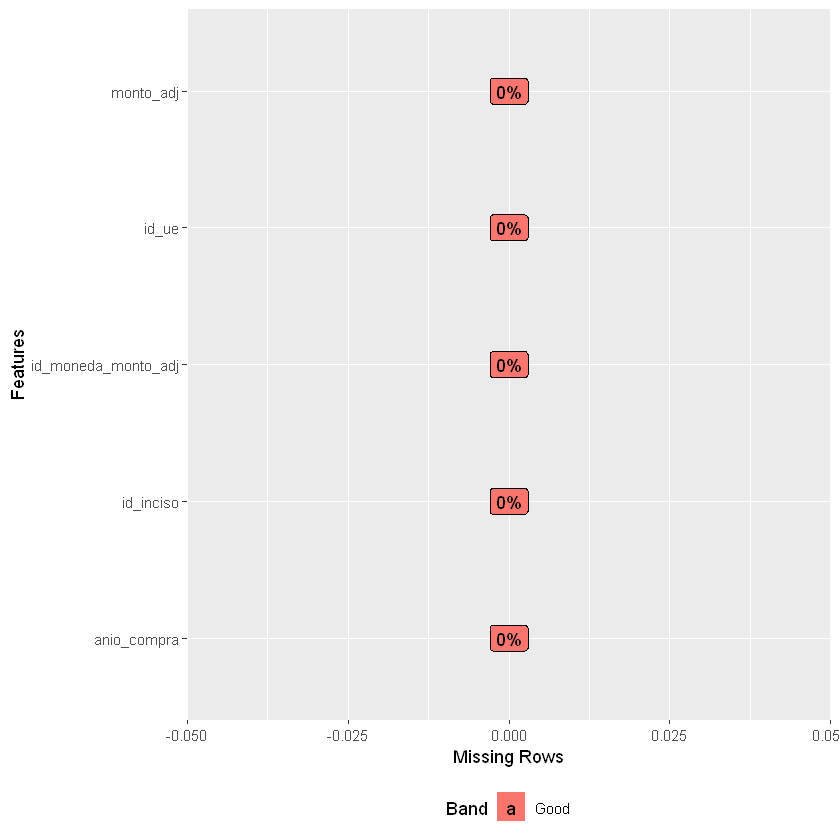

In [17]:
#Columnas vacias del dataSelect
plot_missing(dataSelect)

In [18]:
# Recordemos que columnas tiene el dataSelect
colnames(dataSelect)

[1] "anio_compra"         "id_inciso"           "id_moneda_monto_adj"
[4] "id_ue"               "monto_adj"

In [19]:
# Vamos a contar cantidad de valores "" en las siguientes columnas:

# Imprimo cantidad
print("Cantidad de Valores Vacios:")

cantMontoVacio <- dataSelect %>% select(monto_adj) %>% 
                            filter(monto_adj == 0) %>%  
                            count()
print(paste("Monto Adjudicado: ", cantMontoVacio))

[1] "Cantidad de Valores Vacios:"
[1] "Monto Adjudicado:  1217"


<a id='Conclusiones'></a>
### Conclusiones

---

Para el análisis de datos